In [1]:
from newscatcher import Newscatcher
import pandas as pd
from datetime import datetime

In [2]:
all_headlines_csv = 'data/google-news-headlines.csv'
all_df_headlines = pd.read_csv(all_headlines_csv)

In [3]:
now = datetime.utcnow().strftime('%Y-%m-%d %H:%M')
now

'2020-02-29 06:06'

In [4]:
# get the current headlines
ns = Newscatcher('news.google.com')
df_latest = pd.DataFrame({'datetime': now, 'headline': ns.headlines})

In [5]:
df_latest

,datetime,headline
0,2020-02-29 06:06,Trump urges South Carolina Republicans to vote...
1,2020-02-29 06:06,“Remain in Mexico”: 9th Circuit blocks Trump’s...
2,2020-02-29 06:06,Trump says the coronavirus is the Democrats' '...
3,2020-02-29 06:06,Coronavirus mobile apps are surging in popular...
4,2020-02-29 06:06,"On Video, Chicago Police Shoot Man At Grand-St..."
5,2020-02-29 06:06,Virginia Gov. Ralph Northam vows to break dead...
6,2020-02-29 06:06,Pete Buttigieg draws a crowd in South Carolina...
7,2020-02-29 06:06,Federal government says it won't put coronavir...
8,2020-02-29 06:06,Marine general orders removal of Confederate i...
9,2020-02-29 06:06,Mike Bloomberg says he's running for president...


In [6]:
# merge with the old one
all_df_headlines = all_df_headlines.append(df_latest, sort=True)


In [7]:
all_df_headlines.drop_duplicates(['headline'], inplace=True)

In [8]:
# save all headlines  to file
all_df_headlines.to_csv(all_headlines_csv, index=False)

In [9]:
# is_virus is 1 if there is reference to coronavirus
all_df_headlines['is_virus']= (
    all_df_headlines['headline']
    .apply(lambda v: 1 
           if ('coronavirus' in v.lower()) or ('covid-19' in v.lower())
           else 0)
)

In [10]:
# cumu sum of number of references to virus
all_df_headlines['total_virus'] = all_df_headlines['is_virus'].cumsum()

In [11]:
df_latest_samples = all_df_headlines[all_df_headlines['is_virus']==1].tail(5)
df_latest_samples[['headline']]

,headline
12,Reporting of coronavirus cases uneven as virus...
15,Wall Street is telling clients the coronavirus...
16,The coronavirus is making the weakest parts of...
35,Hoarding in the USA? Coronavirus sparks consum...
37,Elementary School Employee Is Diagnosed With F...


In [12]:
# plot chart number of headline mentioning coronavirus
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

png_file = 'images/google-news-headlines.png'
# convert to pd.datetime
all_df_headlines['datetime_idx'] = pd.to_datetime(all_df_headlines['datetime'], format="%Y-%m-%d %H:%M")
all_df_headlines.set_index('datetime_idx', inplace=True)


In [13]:
all_df_headlines

,datetime,headline,is_virus,total_virus
datetime_idx,,,,
2020-02-27 19:51:00,2020-02-27 19:51,The 31 wildest lines from Donald Trump's self-...,1,1
2020-02-27 21:14:00,2020-02-27 21:14,Coronavirus: Outbreak at 'decisive point' as W...,1,2
2020-02-27 21:14:00,2020-02-27 21:14,Shooter at Milwaukee Molson Coors had a long-r...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,Democratic Leaders Willing to Risk Party Damag...,0,2
2020-02-27 21:14:00,2020-02-27 21:14,"Catherine Pugh, Former Baltimore Mayor, Senten...",0,2
...,...,...,...,...
2020-02-29 06:06:00,2020-02-29 06:06,Tyler Perry orders second autopsy for nephew t...,0,237
2020-02-29 06:06:00,2020-02-29 06:06,Best of Running Back Workouts at the 2020 NFL ...,0,237
2020-02-29 06:06:00,2020-02-29 06:06,Rutgers’ Home Court Is A House Of Horrors In A...,0,237


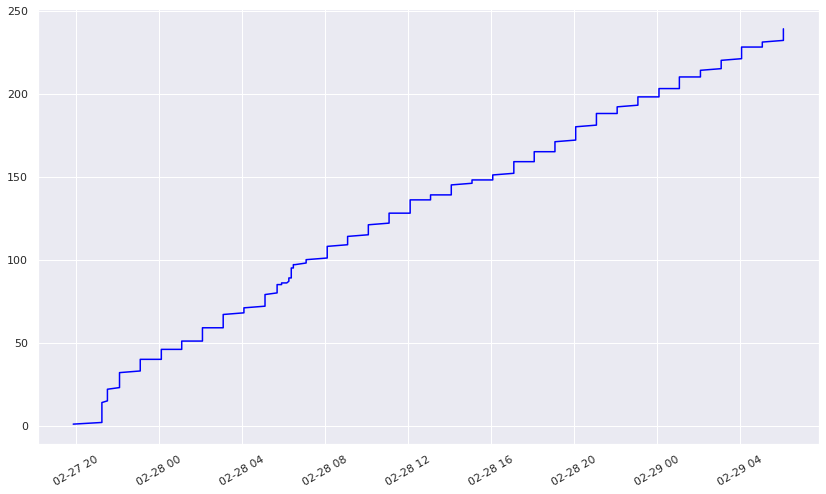

In [14]:
sns.set(rc={'figure.figsize':(14,8)})

fig, axs = plt.subplots(nrows=1)

sns.lineplot(x=all_df_headlines.index, y = 'total_virus', data=all_df_headlines, ax= axs, estimator=None, color='blue')

axs.set_xlabel('')
axs.set_ylabel('')
axs.tick_params(axis='x', labelrotation=30)

In [15]:
fig.savefig(png_file)
